# Options Trading IQ
## Everything You Need to Know About Iron Condors

[Iptions Trading IQ](https://optionstradingiq.com/iron-condors/)

In [2]:
# magic function to plot inline
%matplotlib inline

# python standard modules
import time
import datetime as dt
from math import sqrt, pi


# import numpy, pyplot and scipy
import numpy as np
import pandas as pd
# from openbb import obb
import matplotlib as mat

import matplotlib.pyplot as plt

# for plotting the vol surface
from mpl_toolkits.mplot3d import Axes3D
import scipy
from scipy.stats import norm
from scipy.optimize import brentq
from scipy.interpolate import interp1d

plt.style.use('dark_background')

print(
    f"Numpy {np.__version__}\nMatplotlib {mat.__version__}\nScipy {scipy.__version__}\nPandas {pd.__version__}"
)

Numpy 1.26.3
Matplotlib 3.8.0
Scipy 1.13.1
Pandas 2.1.4


In [3]:
# 1 option contract is usually 100 shares
shares_per_contract = 100

# underlying stock price
S = 47.50

# strike price
put_K = 45.00
lower_strike_put_K = 40.00
call_K = 50.00
higher_strike_call_K = 55.00

# series of underlying stock prices to demonstrate a payoff profile
S_ = np.arange(lower_strike_put_K - lower_strike_put_K/4, higher_strike_call_K + higher_strike_call_K/4, 0.01)

# time to expiration (you'll see this as T-t in the equation)
t = 164.0 / 365.0

# risk free rate (there's nuance to this which we'll describe later)
r = 0.02

# volatility (latent variable which is the topic of this talk)
vol = 0.25

# black scholes prices for demonstrating trades

lower_strike_put_premium = 1.00
put_premium = 2.00
call_premium = 2.00
higher_strike_call_premium = 1.00

In [4]:
print(lower_strike_put_K - lower_strike_put_K/4)
higher_strike_call_K + higher_strike_call_K/4

30.0


68.75

In [5]:
# use a lambda for a payoff functions
# equivelant to:
#
# def call_payoff(S, K):
#     return np.maximum(S - K, 0.0)
call_payoff = lambda S, K: np.maximum(S_ - K, 0.0)
print(call_payoff)
# equivelant to:
#
# def put_payoff(S, K):
#     return np.maximum(K - S, 0.0)
put_payoff = lambda S, K: np.maximum(K - S_, 0.0)
print(put_payoff)

<function <lambda> at 0x7fb1814b4540>
<function <lambda> at 0x7fb1814b40e0>


## Bull Put Credit Spread
The Bull Put Credit Spread strategy involves selling a put option and buying another put option with a lower strike price in the same expiry month.
As the name suggests, this is a bullish option strategy.
Your outlook on the underlying stock is neutral to slightly bullish. Let’s looks at an example:

ABC stock is trading at $47.50 in September.
A trader thinks that ABC will not fall below $45 before October options expiration.
He enters a Bull Put spread by selling an October $45 put for $2 and buying an October $40 put for $1.
The net premium received in the traders account is $100 ($1 x 100 shares per contract).
The maximum risk on the trade is $400 ($5 difference in strike prices, less $1 premium received times 100)
At expiry, if ABC finishes above $45, the trader keeps the $100 premium for a return of 25% on capital at risk.

In [6]:
print("Bull Put Credit Spread")
print(f"Stock price ${S:.2f}")
print(f"Sold ${put_K:.2f} put for ${put_premium:.2f}")
print(f"Bought ${lower_strike_put_K:.2f} put for ${lower_strike_put_premium:.2f}")
net_put_premium_received = (put_premium - lower_strike_put_premium)*100
print(f"Net premium received is {net_put_premium_received:.2f}")
put_strike_range = put_K - lower_strike_put_K
# put_maximum_risk = (put_strike_range - (put_premium - lower_strike_put_premium)) * 100
put_maximum_risk = put_strike_range * 100 - net_put_premium_received
print(f"Maximum risk is ${put_maximum_risk:.2f}")
put_return_on_capital_at_risk = (net_put_premium_received / put_maximum_risk)*100
print(f"Maximum return on capital is {net_put_premium_received:.2f} for a return of {put_return_on_capital_at_risk:.0f}%")

Bull Put Credit Spread
Stock price $47.50
Sold $45.00 put for $2.00
Bought $40.00 put for $1.00
Net premium received is 100.00
Maximum risk is $400.00
Maximum return on capital is 100.00 for a return of 25%


In [7]:
put_payoff(S_, put_K)

array([15.  , 14.99, 14.98, ...,  0.  ,  0.  ,  0.  ])

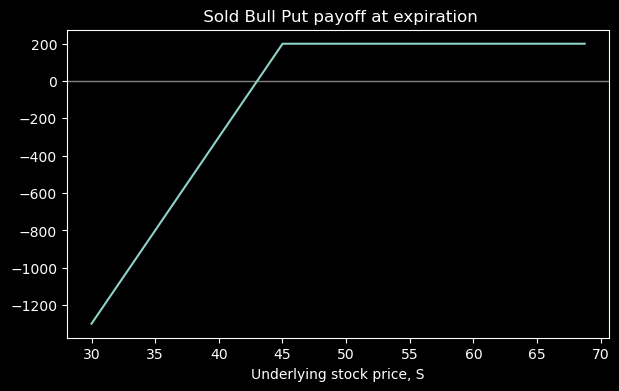

In [8]:
# plot a bull put credit
sold_put_payoff = -put_payoff(S_, put_K)*100
plt.figure(3, figsize=(7, 4))
plt.title(" Sold Bull Put payoff at expiration")
plt.xlabel("Underlying stock price, S")
plt.axhline(y=0, lw=1, c="grey")
plt.plot(S_, put_premium * 100 + sold_put_payoff)

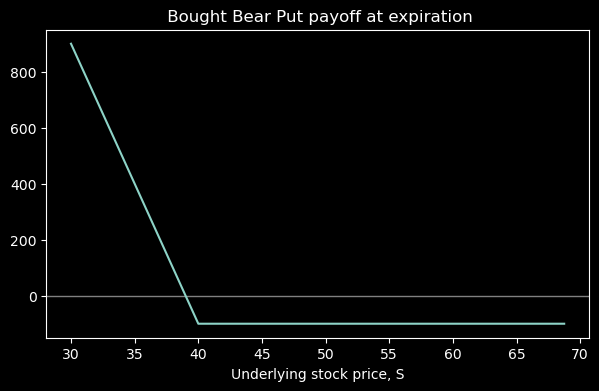

In [9]:
# plot a bear put debit
bought_put_payoff = put_payoff(S_, lower_strike_put_K)*100
plt.figure(3, figsize=(7, 4))
plt.title(" Bought Bear Put payoff at expiration")
plt.xlabel("Underlying stock price, S")
plt.axhline(y=0, lw=1, c="grey")
plt.plot(S_, -lower_strike_put_premium*100 + bought_put_payoff)

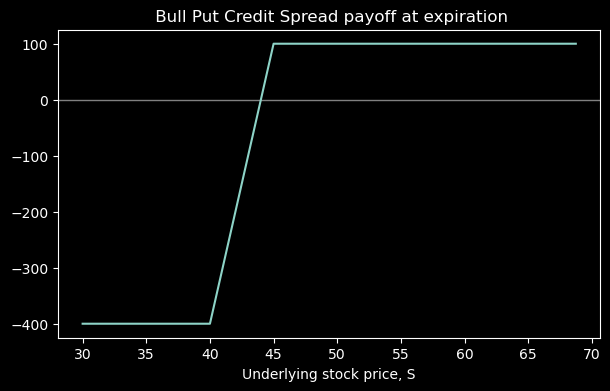

In [10]:
# plot a bull put credit spread
bull_put_credit_spread_payoff = (-put_payoff(S_, put_K) + put_payoff(S_, lower_strike_put_K))*100

plt.figure(3, figsize=(7, 4))
plt.title(" Bull Put Credit Spread payoff at expiration")
plt.xlabel("Underlying stock price, S")
plt.axhline(y=0, lw=1, c="grey")
plt.plot(S_, net_put_premium_received + bull_put_credit_spread_payoff)

## Bear Call Credit Spread
The Bear Call Credit Spread strategy involves selling a call option and buying another call option with a higher strike price in the same expiry month.
This is a bearish option strategy.
Your outlook on the underlying stock is neutral to slightly bearish.
Let’s looks at an example:

ABC stock is trading at $47.50 in September.
A trader thinks that ABC will not rise above $50 before October options expiration.
He enters a Bear Call spread by selling an October $50 call for $2 and buying an October $55 call for $1.
The net premium received in the traders account is $100 ($1 x 100 shares per contract).
The maximum risk on the trade is $400 ($5 difference in strike prices, less $1 premium received times 100)
At expiry, if ABC finishes below $50, the trader keeps the $100 premium for a return of 25% on capital at risk.

In [11]:
print("Bear Call Credit Spread")
print(f"Stock price ${S:.2f}")
print(f"Sold ${call_K:.2f} call for ${call_premium:.2f}")
print(f"Bought ${higher_strike_call_K:.2f} call for ${higher_strike_call_premium:.2f}")
net_call_premium_received = (call_premium - higher_strike_call_premium)*100
print(f"Net premium received is {net_call_premium_received:.2f}")
call_strike_range = higher_strike_call_K - call_K
call_maximum_risk = call_strike_range * 100 - net_call_premium_received
print(f"Maximum risk is ${call_maximum_risk:.2f}")
call_return_on_capital_at_risk = (net_call_premium_received / call_maximum_risk)*100
print(f"Maximum return on capital is {net_call_premium_received:.2f} for a return of {call_return_on_capital_at_risk:.0f}%")

Bear Call Credit Spread
Stock price $47.50
Sold $50.00 call for $2.00
Bought $55.00 call for $1.00
Net premium received is 100.00
Maximum risk is $400.00
Maximum return on capital is 100.00 for a return of 25%


In [12]:
call_payoff(S_, call_K)

array([ 0.  ,  0.  ,  0.  , ..., 18.72, 18.73, 18.74])

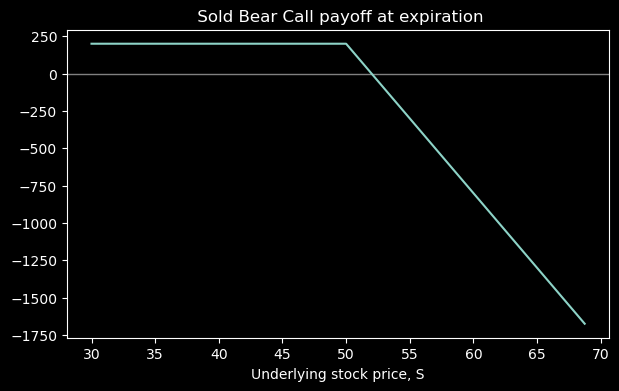

In [13]:
# plot a bear call credit
sold_call_payoff = -call_payoff(S_, call_K)*100
plt.figure(3, figsize=(7, 4))
plt.title(" Sold Bear Call payoff at expiration")
plt.xlabel("Underlying stock price, S")
plt.axhline(y=0, lw=1, c="grey")
plt.plot(S_, call_premium * 100 + sold_call_payoff)

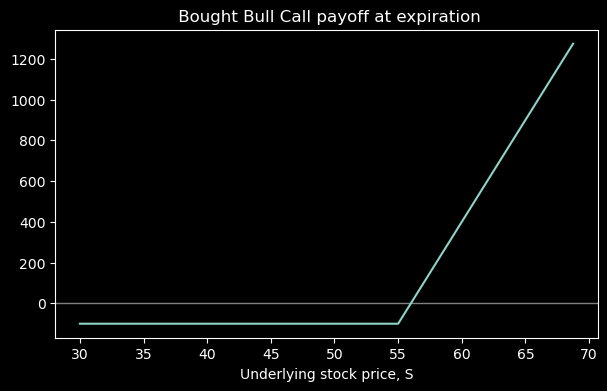

In [14]:
# plot a bull call debit
bought_call_payoff = call_payoff(S_, higher_strike_call_K)*100
plt.figure(3, figsize=(7, 4))
plt.title(" Bought Bull Call payoff at expiration")
plt.xlabel("Underlying stock price, S")
plt.axhline(y=0, lw=1, c="grey")
plt.plot(S_, -higher_strike_call_premium*100 + bought_call_payoff)

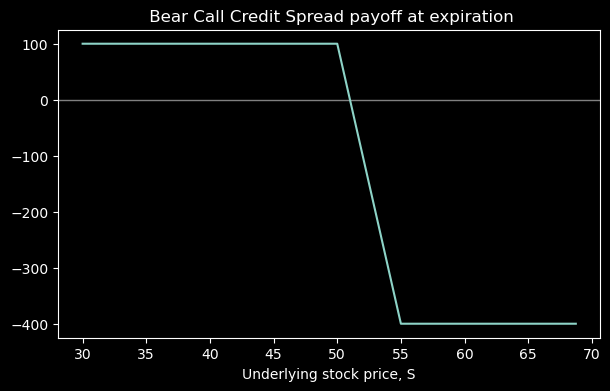

In [15]:
# plot a bear call credit spread
bear_call_credit_spread_payoff = (-call_payoff(S_, call_K) + call_payoff(S_, higher_strike_call_K))*100

plt.figure(3, figsize=(7, 4))
plt.title(" Bear Call Credit Spread payoff at expiration")
plt.xlabel("Underlying stock price, S")
plt.axhline(y=0, lw=1, c="grey")
plt.plot(S_, net_call_premium_received + bear_call_credit_spread_payoff)

## Iron Condor

In [16]:
print("Iron Condor")
print(f"Stock price ${S:.2f}")
print(f"Sold ${put_K:.2f} put for ${put_premium:.2f}")
print(f"Bought ${lower_strike_put_K:.2f} put for ${lower_strike_put_premium:.2f}")
net_put_premium_received = (put_premium - lower_strike_put_premium)*100
print(f"Net put premium received is {net_put_premium_received:.2f}")
print(f"Sold ${call_K:.2f} call for ${call_premium:.2f}")
print(f"Bought ${higher_strike_call_K:.2f} call for ${higher_strike_call_premium:.2f}")
net_call_premium_received = (call_premium - higher_strike_call_premium)*100
print(f"Net call premium received is {net_call_premium_received:.2f}")
net_premium_received = net_put_premium_received+net_call_premium_received
print(f"Net premium received is {net_premium_received:.2f}")
put_strike_range = put_K - lower_strike_put_K
# put_maximum_risk = (put_strike_range - (put_premium - lower_strike_put_premium)) * 100
maximum_risk = put_strike_range * 100 - net_premium_received
print(f"Maximum risk is ${maximum_risk:.2f}")
return_on_capital_at_risk = (net_premium_received / maximum_risk)*100
print(f"Maximum return on capital is {net_premium_received:.2f} for a return of {return_on_capital_at_risk:.0f}%")
print(f"Lower breakeven is {(put_K - net_premium_received/100):.2f}")
print(f"Upper breakeven is {(call_K + net_premium_received/100):.2f}")

Iron Condor
Stock price $47.50
Sold $45.00 put for $2.00
Bought $40.00 put for $1.00
Net put premium received is 100.00
Sold $50.00 call for $2.00
Bought $55.00 call for $1.00
Net call premium received is 100.00
Net premium received is 200.00
Maximum risk is $300.00
Maximum return on capital is 200.00 for a return of 67%
Lower breakeven is 43.00
Upper breakeven is 52.00


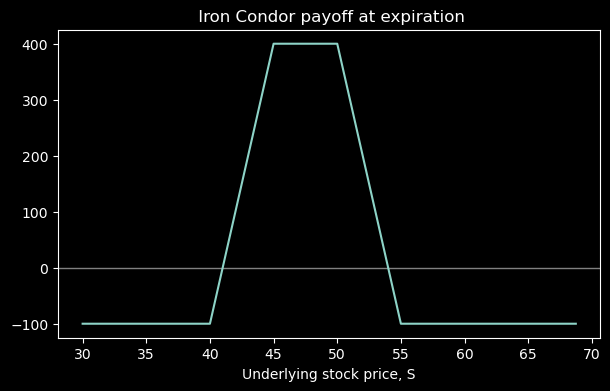

In [17]:
# plot the iron condor
iron_condor_payoff = (-put_payoff(S_, put_K)
                      + put_payoff(S_, lower_strike_put_K) 
                      - call_payoff(S_, call_K) 
                      + call_payoff(S_, higher_strike_call_K))*100
plt.figure(3, figsize=(7, 4))
plt.title(" Iron Condor payoff at expiration")
plt.xlabel("Underlying stock price, S")
plt.axhline(y=0, lw=1, c="grey")
plt.plot(S_, (call_premium + put_premium) * 100 + iron_condor_payoff)